In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)})

import warnings 
warnings.simplefilter('ignore')

#### In the data analytics, I wrote SQL queries and extracted a random sample from the InfoOfUsers.db, since the original dataset is too big to load in pandas

In [3]:
df = pd.read_csv("UserInfoRandom.csv")

In [4]:
df.head()

,InfoId,UserId,Email,FirstName,LastName,Telephone,CompanyName,Address,CountryName,IpAddress,...,UserFotoUrl,UserCoverUrl,Description,Industry,PaymentStatus,Tokens,EmazeSite,feedPriority,FacebookUserId,AliasSource
0,2,3e6e1bda-b2d1-4482-9596-6b7e4cbdf64e,joseph.j.obrien@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,159.63.21.186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,23,b802f386-d78b-41c5-817d-1639db7b9d97,firdovsi_mutallimov@yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN,85.132.100.213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,71,c15b629e-6272-458e-b652-0607081310dd,alfy.87@libero.it,NaN,NaN,NaN,NaN,NaN,NaN,79.8.23.158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,75,e79ed8e8-aa6c-4575-988f-8d5b79eb7337,princesnaaz33@yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN,182.188.198.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,85,27516bbb-cc1d-444e-9a3c-ddc1593dd80b,carolywilliams@yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN,70.196.194.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [5]:
df.columns

Index(['InfoId', 'UserId', 'Email', 'FirstName', 'LastName', 'Telephone',
       'CompanyName', 'Address', 'CountryName', 'IpAddress', 'CountryCode',
       'AffiliateId', 'SubId', 'RegisterDate', 'LastLoginDate', 'Status',
       'PremiumStartDate', 'PremiumEndDate', 'PaymentProcessor',
       'PaymentReference', 'CampaignId', 'Alias', 'InitialPaymentAmount',
       'RecurringPaymentAmount', 'Funnel', 'PricingSource', 'RecurringCycle',
       'TrialPeriod', 'PublicEmail', 'WebSite', 'UserFotoUrl', 'UserCoverUrl',
       'Description', 'Industry', 'PaymentStatus', 'Tokens', 'EmazeSite',
       'feedPriority', 'FacebookUserId', 'AliasSource'],
      dtype='object')

In [6]:
df.isnull().sum()

InfoId                        0
UserId                        0
Email                         0
FirstName                 50573
LastName                  52711
Telephone                 52777
CompanyName               52777
Address                   52556
CountryName               52777
IpAddress                     0
CountryCode                   4
AffiliateId                3499
SubId                      5838
RegisterDate                  0
LastLoginDate                 0
Status                        0
PremiumStartDate          52401
PremiumEndDate            52397
PaymentProcessor          52450
PaymentReference          52481
CampaignId                 2019
Alias                       539
InitialPaymentAmount      52436
RecurringPaymentAmount    52436
Funnel                    21490
PricingSource             52404
RecurringCycle            52480
TrialPeriod               52462
PublicEmail               52577
WebSite                   52560
UserFotoUrl               52664
UserCove

In [7]:
df.dtypes

InfoId                      int64
UserId                     object
Email                      object
FirstName                  object
LastName                   object
Telephone                 float64
CompanyName               float64
Address                    object
CountryName               float64
IpAddress                  object
CountryCode                object
AffiliateId                object
SubId                      object
RegisterDate               object
LastLoginDate              object
Status                      int64
PremiumStartDate           object
PremiumEndDate             object
PaymentProcessor           object
PaymentReference           object
CampaignId                 object
Alias                      object
InitialPaymentAmount      float64
RecurringPaymentAmount    float64
Funnel                    float64
PricingSource              object
RecurringCycle             object
TrialPeriod               float64
PublicEmail                object
WebSite       

In [8]:
df["PaymentStatus"].unique()

array([nan, 'Cancel', 'Fail', 'Active', 'Chargeback', 'Refund'],
      dtype=object)

In [9]:
df = df.drop(columns=["InfoId", "Telephone", "AffiliateId", "SubId", "CompanyName", "feedPriority", "PublicEmail", "Address", "CountryName", "Funnel", "UserFotoUrl", "UserCoverUrl", "FacebookUserId"])

In [10]:
df["Status"].unique() # status can indicate whether the user is a paying or a non-paying user

array([0, 2, 5, 3, 1, 4])

In [11]:
df["Description"].unique()

array([nan, 'I am an emazing presenter,\nI like design, music and fun.',
       'Docente', ' ', 'Sistemas e informática',
       'Expert em ferramentas de produtividade e apresentações.',
       'Just here to get these projects done.',
       'I am an 8th grade English teacher and professional learning facilitator in Maryland.',
       'I am an Elementary School Learning Coach.  I love learning about learning!',
       'Coordinator for Instruction\nInstructional Designer\nTechnology Integration',
       'brock university',
       'I am Spanish language instructor, I  love emaze to present my contents.',
       'I am an emazing presenter,\nI like design.',
       'I am who I am.\nI like write, draw and sleep.',
       'I love acting, art, and singing.',
       'Lead Teacher of School of Zoological and Botanical Studies Magnet Program',
       'I am an emazing presenter,\nI like writing, music, reading and fun.',
       "I don't like people", 'Bitcoin!',
       'I am an emazing presenter

In [12]:
df_Premium_end = df.dropna(subset=['PremiumEndDate']) #ppl who ended premium membership (still need to check on the duration of their subscription and its relation to status)

In [13]:
# dropping some user info that doesn't seem useful
df = df.drop(columns=["FirstName", "LastName", "IpAddress", "Alias", "Tokens", "AliasSource"]) 

In [14]:
df.groupby("Status")["InitialPaymentAmount"].mean()

Status
0    3493.585702
1       8.216667
2      24.318476
3      37.125000
4      27.000000
5       0.000000
Name: InitialPaymentAmount, dtype: float64

In [15]:
df[["PremiumStartDate", "PremiumEndDate", "RegisterDate", "LastLoginDate"]] = df[["PremiumStartDate", "PremiumEndDate", "RegisterDate", "LastLoginDate"]].apply(pd.to_datetime)

In [16]:
df.dtypes

UserId                            object
Email                             object
CountryCode                       object
RegisterDate              datetime64[ns]
LastLoginDate             datetime64[ns]
Status                             int64
PremiumStartDate          datetime64[ns]
PremiumEndDate            datetime64[ns]
PaymentProcessor                  object
PaymentReference                  object
CampaignId                        object
InitialPaymentAmount             float64
RecurringPaymentAmount           float64
PricingSource                     object
RecurringCycle                    object
TrialPeriod                      float64
WebSite                           object
Description                       object
Industry                          object
PaymentStatus                     object
EmazeSite                         object
dtype: object

#### Investigating payment status of paid users among all the random users

In [17]:
df["PaymentStatus"].unique()

array([nan, 'Cancel', 'Fail', 'Active', 'Chargeback', 'Refund'],
      dtype=object)

In [18]:
total_paid_users = df.dropna(subset=["PaymentStatus"])

In [19]:
total_paid_users.shape

(271, 21)

In [20]:
active_users = df[df["PaymentStatus"]=="Active"]
active_users.head()

,UserId,Email,CountryCode,RegisterDate,LastLoginDate,Status,PremiumStartDate,PremiumEndDate,PaymentProcessor,PaymentReference,...,InitialPaymentAmount,RecurringPaymentAmount,PricingSource,RecurringCycle,TrialPeriod,WebSite,Description,Industry,PaymentStatus,EmazeSite
1940,230cf445-2cb2-4b20-bf65-f6b0b0c8750c,jtconcepts66@gmail.com,US,2013-07-05 16:18:37.310,2013-07-05 16:18:37.310,0,NaT,NaT,NaN,I-FH026AMT1XPD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,NaN
26631,1878d113-934a-4157-9f73-195debda2ead,edwardanobah@gmail.com,GB,2014-02-24 21:56:36.487,2018-07-07 22:47:17.787,1,2015-06-09 23:29:08.197,2021-06-24 00:19:33.477,BlueSnap,33002676,...,34.8,34.8,Money,Yearly,0.0,www.emaze.com,"I am an emazing presenter,\nI like design, mus...",none,Active,NaN
35216,2f299f57-9419-4ea7-8844-39f04324020a,linsey@cloud9software.nl,NL,2014-04-16 11:47:44.720,2018-11-20 13:44:02.850,2,2014-09-29 07:44:08.053,2020-09-29 08:00:30.413,BlueSnap,29504809,...,58.8,58.8,Money,Yearly,0.0,NaN,NaN,NaN,Active,NaN
40973,b53269f6-1050-4311-a886-7b15e0a7b826,WChrisman@ccad.edu,US,2014-05-12 02:11:41.427,2020-03-23 23:09:23.867,1,2015-10-26 15:31:57.397,2020-11-05 18:37:30.067,BlueSnap,34568872,...,36.0,36.0,Money,Yearly,0.0,www.emaze.com,NaN,education,Active,NaN
44193,fe4f7d7d-991b-4230-9537-64a5e1af6055,kapmat09@gmail.com,HK,2014-05-28 13:17:16.793,2015-06-08 01:43:49.460,0,2014-05-28 13:22:12.460,2014-08-28 17:36:18.247,bs,28880500,...,2.9,2.9,Money,Monthly,NaN,www.emaze.com,,NaN,Active,NaN


In [21]:
active_users.shape

(17, 21)

In [22]:
cancel_users = df[df["PaymentStatus"]=="Cancel"]
cancel_users.shape

(219, 21)

In [23]:
refund_users = df[df["PaymentStatus"]=="Refund"] 
refund_users #can we categorize refund as part of the canceled payments?

,UserId,Email,CountryCode,RegisterDate,LastLoginDate,Status,PremiumStartDate,PremiumEndDate,PaymentProcessor,PaymentReference,...,InitialPaymentAmount,RecurringPaymentAmount,PricingSource,RecurringCycle,TrialPeriod,WebSite,Description,Industry,PaymentStatus,EmazeSite
34427,39889699-8345-4563-839e-223e8ced2f97,vpoornima1994@hotmail.com,SG,2014-04-13 08:36:47.697,2017-04-06 08:38:02.303,0,2016-06-17 17:53:50.177,2016-07-03 09:35:57.603,BlueSnap,37798082,...,0.00,54.00,Money,NaN,14.0,NaN,NaN,NaN,Refund,NaN
40783,dde6d075-dedb-4250-bee0-2f5732a5756b,spena24@gmail.com,US,2014-05-10 22:04:26.367,2014-06-12 22:16:07.333,1,2014-05-11 04:45:24.043,2014-08-20 00:00:00.000,BlueSnap,28751646,...,2.90,2.90,Money,Monthly,0.0,NaN,NaN,NaN,Refund,NaN
43545,94ffcd30-5dc2-4759-8189-30711b6d8770,mandeep.redscarf@gmail.com,IN,2014-05-24 10:16:24.760,2014-07-10 11:46:13.390,2,2014-06-17 14:08:38.963,2015-06-17 14:08:38.963,BlueSnap,29034202,...,47.04,47.04,Money,Yearly,0.0,NaN,NaN,NaN,Refund,NaN
45621,508c4491-6d13-4afe-9d23-48a07e172b08,rachel.scott@catholic.tas.edu.au,AU,2014-06-04 05:33:03.247,2014-11-16 21:45:21.783,0,2014-09-25 10:13:26.663,2015-10-19 09:27:40.840,BlueSnap,29728398,...,34.80,34.80,Money,Yearly,0.0,NaN,NaN,NaN,Refund,NaN
47234,e2b69f37-23a4-47be-9c81-aa3dd585f9b5,irenebroekhuijse@cantab.net,NL,2014-06-12 20:02:26.850,2015-07-31 13:10:51.027,0,2014-12-04 07:58:12.753,2014-12-04 15:37:52.820,BlueSnap,29808489,...,58.80,58.80,Money,Yearly,0.0,NaN,NaN,NaN,Refund,NaN
47561,6e8e9932-1aa4-40c8-a228-b8a124ee69ca,sheila.krotz@gmail.com,US,2014-06-15 05:47:13.837,2014-06-22 05:24:25.907,1,2014-06-19 01:01:12.513,2015-06-19 01:01:12.513,bs,29046676,...,27.84,27.84,Money,Yearly,NaN,NaN,NaN,NaN,Refund,NaN
47834,4c4ce715-5bcf-4c13-bac5-65a18f59167b,s.m.campbell@hotmail.com,US,2014-06-16 23:12:07.960,2015-11-19 23:48:19.207,0,2014-06-19 00:58:53.173,2014-08-19 00:58:53.173,bs,29046648,...,2.90,2.90,Money,Monthly,NaN,NaN,NaN,education,Refund,NaN
48286,261d6db6-fc0f-4d03-8e62-a59826abf7db,catalinacortesp@gmail.com,CO,2014-06-19 02:03:05.520,2019-02-13 18:40:45.583,0,2014-08-22 17:52:38.010,2015-09-01 09:12:07.247,bs,29457836,...,58.80,58.80,Money,Yearly,NaN,NaN,NaN,NaN,Refund,NaN
51373,d4d8bc1d-55ec-47f1-8e5a-a3a1f8b23608,rbenway@arnegdml.com,CA,2014-07-09 17:49:34.200,2014-08-11 12:58:22.507,2,2014-07-09 19:16:46.227,2014-10-09 19:16:46.227,BlueSnap,29176834,...,4.90,4.90,Money,Monthly,0.0,NaN,NaN,NaN,Refund,NaN


In [24]:
chargeback_users = df[df["PaymentStatus"]=="Chargeback"] 
chargeback_users #I assume chargeback == refund?

,UserId,Email,CountryCode,RegisterDate,LastLoginDate,Status,PremiumStartDate,PremiumEndDate,PaymentProcessor,PaymentReference,...,InitialPaymentAmount,RecurringPaymentAmount,PricingSource,RecurringCycle,TrialPeriod,WebSite,Description,Industry,PaymentStatus,EmazeSite
20294,8955f820-c0f6-40e0-8aa8-57cf6b485213,geneis.crime@yahoo.com,US,2014-01-11 19:43:27.733,2016-05-24 07:33:23.980,0,2016-05-17 02:09:17.290,2016-07-13 01:20:05.130,BlueSnap,37392910,...,0.0,108.00,Money,NaN,14.0,NaN,NaN,NaN,Chargeback,NaN
44792,71a2c4f1-f9b1-48c4-a988-147aa01eddf2,gabrielgoes92@gmail.com,MX,2014-05-31 02:01:47.750,2016-05-10 04:09:36.087,2,2016-05-10 04:09:31.813,2017-05-29 05:04:31.537,BlueSnap,37300748,...,0.0,720.00,Money,NaN,14.0,NaN,NaN,NaN,Chargeback,NaN
47008,cc3aaee8-3e5f-460f-9a2e-ff71dfb541d8,kmakinster@web.com,US,2014-06-11 14:00:42.697,2017-12-14 15:28:20.567,0,2015-06-16 12:58:09.367,2017-09-18 12:59:16.110,BlueSnap,33077418,...,300.0,300.00,Money,Yearly,0.0,NaN,NaN,NaN,Chargeback,NaN
48558,ba089a33-0054-43a7-bdfd-cce980a35bdc,shawneelyn@yahoo.com,US,2014-06-20 22:33:01.880,2015-03-11 20:13:14.010,2,2015-03-11 20:12:48.420,2016-04-13 20:12:48.420,BlueSnap,31610218,...,0.0,58.68,Money,NaN,30.0,NaN,NaN,business,Chargeback,NaN
51182,725cf6d3-0e80-4686-a29c-5f7da74b5f8d,brad@bensmanmarketinggrouop.com,US,2014-07-08 21:18:56.593,2015-03-03 21:55:06.890,0,2014-08-11 15:46:09.957,2018-08-21 00:11:31.100,BlueSnap,29384290,...,58.8,58.80,Money,Yearly,0.0,NaN,NaN,NaN,Chargeback,NaN


In [25]:
fail_users = df[df["PaymentStatus"]=="Fail"] 
fail_users.shape #what does fail mean?

(21, 21)

In [149]:
df_paystatus = df.groupby("PaymentStatus", as_index=False)["UserId"].count()

In [150]:
df_paystatus = df_paystatus.rename(columns={"UserId": "Number"})

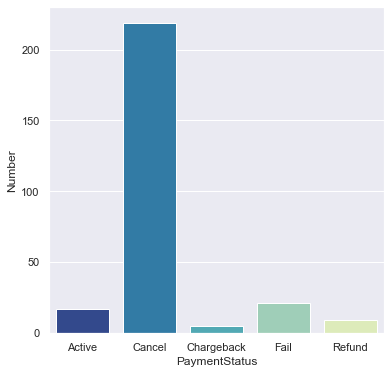

In [160]:
sns.barplot(x="PaymentStatus", y="Number", data=df_paystatus, palette="YlGnBu_r")

> Some insights about the different payment pattern:

### Survey of users who originally paid and their industry 

In [26]:
pu = pd.read_csv("PayUserInfo.csv") #pu == paid users

In [27]:
pu.shape

(5687, 55)

In [28]:
pu.columns

Index(['PaymentSurveyId', 'UserId', 'UserName', 'CompanyName', 'NumEmployees',
       'YourRole', 'Department', 'Q1Id', 'Q2Id', 'Q3Id', 'Q4Id', 'A1', 'A2',
       'A3', 'A4', 'InfoId', 'UserId.1', 'Email', 'FirstName', 'LastName',
       'Telephone', 'CompanyName.1', 'Address', 'CountryName', 'IpAddress',
       'CountryCode', 'AffiliateId', 'SubId', 'RegisterDate', 'LastLoginDate',
       'Status', 'PremiumStartDate', 'PremiumEndDate', 'PaymentProcessor',
       'PaymentReference', 'CampaignId', 'Alias', 'InitialPaymentAmount',
       'RecurringPaymentAmount', 'Funnel', 'PricingSource', 'RecurringCycle',
       'TrialPeriod', 'PublicEmail', 'WebSite', 'UserFotoUrl', 'UserCoverUrl',
       'Description', 'Industry', 'PaymentStatus', 'Tokens', 'EmazeSite',
       'feedPriority', 'FacebookUserId', 'AliasSource'],
      dtype='object')

In [29]:
pu["UserId.1"]

0       0001bd99-ce45-4d8e-9423-584c5d2161bc
1       000d8ba8-f536-43a6-befe-7e9e08ff2cb0
2       001b0fdd-60ab-4f5e-bdd5-62392cd4e52f
3       0039a65a-4b00-411b-9440-9590993d2f06
4       003cdeab-82fe-4dd7-8330-130e51a0a1da
                        ...                 
5682    ffa775dc-77f7-4840-83cf-e85caa9dd4ce
5683    fff5b7fa-d62e-4e56-a807-f2a146ca039b
5684    fec023da-8e95-495a-a2d0-47e092b8208b
5685    fff549ec-becb-4e25-86d7-8ee6c64f0d4f
5686    fff0d68f-f4b2-4a72-b607-e9b1aae3e19c
Name: UserId.1, Length: 5687, dtype: object

In [30]:
pu.dtypes

PaymentSurveyId             int64
UserId                     object
UserName                   object
CompanyName                object
NumEmployees               object
YourRole                   object
Department                 object
Q1Id                      float64
Q2Id                      float64
Q3Id                      float64
Q4Id                      float64
A1                         object
A2                         object
A3                         object
A4                        float64
InfoId                    float64
UserId.1                   object
Email                      object
FirstName                  object
LastName                   object
Telephone                 float64
CompanyName.1             float64
Address                    object
CountryName               float64
IpAddress                  object
CountryCode                object
AffiliateId                object
SubId                      object
RegisterDate               object
LastLoginDate 

In [31]:
pu.isnull().sum()

PaymentSurveyId              0
UserId                       0
UserName                     0
CompanyName               1156
NumEmployees              1239
YourRole                   781
Department                1104
Q1Id                      4962
Q2Id                      4962
Q3Id                      4962
Q4Id                      5687
A1                        4964
A2                        4962
A3                        4963
A4                        5687
InfoId                       2
UserId.1                     2
Email                        2
FirstName                   40
LastName                  5107
Telephone                 5687
CompanyName.1             5687
Address                   4038
CountryName               5687
IpAddress                    2
CountryCode                  6
AffiliateId                 75
SubId                       19
RegisterDate                 2
LastLoginDate                2
Status                       2
PremiumStartDate          1760
PremiumE

In [32]:
#drop some unhelpful columns
pu = pu.drop(columns=["Q1Id","Q2Id", "Q3Id","Q4Id","A1","A2","A3","A4", "InfoId", "UserId.1","Telephone", "SubId","FirstName", "LastName", "AffiliateId", "SubId", "CompanyName.1", "feedPriority", "PublicEmail", "WebSite","Address", "CountryName", "Tokens", "EmazeSite", "Funnel", "AliasSource", "UserFotoUrl", "UserCoverUrl", "FacebookUserId"])

In [33]:
pu.head()

,PaymentSurveyId,UserId,UserName,CompanyName,NumEmployees,YourRole,Department,Email,IpAddress,CountryCode,...,CampaignId,Alias,InitialPaymentAmount,RecurringPaymentAmount,PricingSource,RecurringCycle,TrialPeriod,Description,Industry,PaymentStatus
0,5613,0001bd99-ce45-4d8e-9423-584c5d2161bc,leodefelice@hotmail.com,POS EMPRESARIAL,2-5,C-Level,Marketing,leodefelice@hotmail.com,177.140.70.236,BR,...,none,leodefelice,168.0,168.0,Money,Yearly,0.0,"I am an emazing presenter,\nI like design, mus...",NaN,Cancel
1,675,000d8ba8-f536-43a6-befe-7e9e08ff2cb0,tlooms@gmail.com,NaN,NaN,NaN,NaN,tlooms@gmail.com,74.110.108.224,US,...,none,tlooms,39.0,0.0,Money,Monthly,0.0,"I am an emazing presenter,\nI like design, mus...",Education,Cancel
2,6118,001b0fdd-60ab-4f5e-bdd5-62392cd4e52f,anna_willeit@hotmail.com,Jaeger Bau GmbH,51-200,Student/Intern,Marketing,anna_willeit@hotmail.com,93.82.121.97,AT,...,none,anna_willeit,39.0,0.0,ThankYouPage,Monthly,0.0,"I am an emazing presenter,\nI like design, mus...",Student,Active
3,3271,0039a65a-4b00-411b-9440-9590993d2f06,elizabeth.wilcox@dys.ohio.gov,Ohio Department of Youth Services,500,NaN,Other,elizabeth.wilcox@dys.ohio.gov,66.194.72.18,US,...,none,elizabeth.wilcox,36.0,36.0,Money,Yearly,0.0,NaN,Education,Fail
4,6121,003cdeab-82fe-4dd7-8330-130e51a0a1da,fdo_rv_m@hotmail.com,Grupo SARU,11-50,Individual,PR,fdo_rv_m@hotmail.com,177.229.210.147,MX,...,none,fdo_rv_m,1680.0,1680.0,Money,Yearly,0.0,NaN,NaN,Fail


In [34]:
pu_country = pu.groupby("CountryCode", as_index=False)["UserId"].count()

In [35]:
pu_country = pu_country.rename(columns={"UserId": "User Number"})

In [123]:
pu_country.sort_values(by=["User Number"], ascending=False)

,CountryCode,User Number
122,US,1824
84,MX,704
58,IL,212
10,AU,211
26,CO,206
...,...,...
44,GD,1
42,GA,1
40,FJ,1
74,LR,1


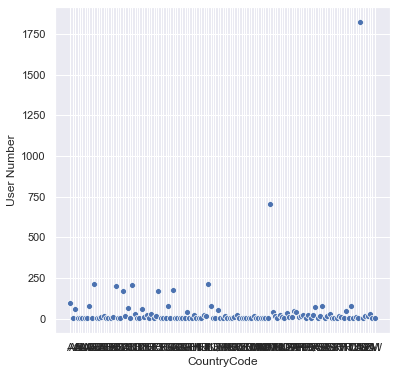

In [37]:
sns.scatterplot(x="CountryCode", y="User Number", data=pu_country) #barchart doesn't reflect countries the best

In [38]:
#trying making a geodata

In [52]:
import geopandas as gpd
shapefile = 'country_dataset/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ISO_A2', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf

,country,country_code,geometry
0,Fiji,FJ,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZ,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,EH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CA,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,US,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...
172,Republic of Serbia,RS,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Montenegro,ME,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Kosovo,XK,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Trinidad and Tobago,TT,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [73]:
print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

Empty GeoDataFrame
Columns: [country, country_code, geometry]
Index: []


In [75]:
merged = gdf.merge(pu_country, left_on = 'country_code', right_on = 'CountryCode', how = 'left')

In [76]:
merged

,country,country_code,geometry,CountryCode,User Number
0,Fiji,FJ,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJ,1.0
1,United Republic of Tanzania,TZ,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZ,2.0
2,Western Sahara,EH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,Canada,CA,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CA,172.0
4,United States of America,US,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",US,1824.0
...,...,...,...,...,...
170,Republic of Serbia,RS,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",RS,2.0
171,Montenegro,ME,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN
172,Kosovo,XK,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN
173,Trinidad and Tobago,TT,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",TT,2.0


In [77]:
merged = merged.drop(columns=["CountryCode"])
merged.head()

,country,country_code,geometry,User Number
0,Fiji,FJ,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.0
1,United Republic of Tanzania,TZ,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2.0
2,Western Sahara,EH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,Canada,CA,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",172.0
4,United States of America,US,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1824.0


In [78]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())

#Convert to String like object.
json_data = json.dumps(merged_json)

In [81]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest number.
palette = palette[::-1]

#Instantiate LinearColorMapper that maps numbers in a range linearly into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40, nan_color = '#d9d9d9')

#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Paid Users Distribution', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'User Number', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)

Loading BokehJS ...

### Investigate the industry of paid users

In [82]:
pu.head()

,PaymentSurveyId,UserId,UserName,CompanyName,NumEmployees,YourRole,Department,Email,IpAddress,CountryCode,...,CampaignId,Alias,InitialPaymentAmount,RecurringPaymentAmount,PricingSource,RecurringCycle,TrialPeriod,Description,Industry,PaymentStatus
0,5613,0001bd99-ce45-4d8e-9423-584c5d2161bc,leodefelice@hotmail.com,POS EMPRESARIAL,2-5,C-Level,Marketing,leodefelice@hotmail.com,177.140.70.236,BR,...,none,leodefelice,168.0,168.0,Money,Yearly,0.0,"I am an emazing presenter,\nI like design, mus...",NaN,Cancel
1,675,000d8ba8-f536-43a6-befe-7e9e08ff2cb0,tlooms@gmail.com,NaN,NaN,NaN,NaN,tlooms@gmail.com,74.110.108.224,US,...,none,tlooms,39.0,0.0,Money,Monthly,0.0,"I am an emazing presenter,\nI like design, mus...",Education,Cancel
2,6118,001b0fdd-60ab-4f5e-bdd5-62392cd4e52f,anna_willeit@hotmail.com,Jaeger Bau GmbH,51-200,Student/Intern,Marketing,anna_willeit@hotmail.com,93.82.121.97,AT,...,none,anna_willeit,39.0,0.0,ThankYouPage,Monthly,0.0,"I am an emazing presenter,\nI like design, mus...",Student,Active
3,3271,0039a65a-4b00-411b-9440-9590993d2f06,elizabeth.wilcox@dys.ohio.gov,Ohio Department of Youth Services,500,NaN,Other,elizabeth.wilcox@dys.ohio.gov,66.194.72.18,US,...,none,elizabeth.wilcox,36.0,36.0,Money,Yearly,0.0,NaN,Education,Fail
4,6121,003cdeab-82fe-4dd7-8330-130e51a0a1da,fdo_rv_m@hotmail.com,Grupo SARU,11-50,Individual,PR,fdo_rv_m@hotmail.com,177.229.210.147,MX,...,none,fdo_rv_m,1680.0,1680.0,Money,Yearly,0.0,NaN,NaN,Fail


In [83]:
pu.shape

(5687, 27)

In [93]:
pu["Industry"].unique()

array([nan, 'Education', 'Student', 'Business', 'Marketing', 'Other',
       'business', 'education', 'Design', 'Training', 'Teacher',
       'buisness', 'other', 'University Professor', 'High School Student',
       'Middle School Student', 'none', 'Non-Profit',
       'University Student', 'Sales', 'Teacher K-12', 'O Negócio',
       'Eğitim', 'Educación', '你會怎麼做？', 'Öğretmen', 'Ed Tech Specialist',
       'Образование', '다른', 'Outro', 'Negocios', 'Otro', 'O negócio',
       'تجارت'], dtype=object)

>Edu: education, student, Teacher, university professor, high school student, middle school student, university student, teacher k-12, Eğitim, Educación, Öğretmen, Ed Tech Specialist, Образование

>Business: O negócio, business, marketing, training, sales, Negocios, تجارت

>Design: Design
Non profit:Non-Profit

In [88]:
pu["YourRole"].unique() #if role is C-Level, VP/Director, Consultant --> industry business

array(['C-Level', nan, 'Student/Intern', 'Individual', 'Teacher', 'None',
       'VP/Director', 'Consultant'], dtype=object)

>if role is C-Level, VP/Director, Consultant --> industry business
>if role is Student/Intern (and Industry is education) -->industry education
>if role is student/intern (and industry is business) -->industry business

In [99]:
biz = ["Business", "Marketing", "business", "Training", "buisness", "Sales", "O Negócio", "Negocios", "O negócio", "تجارت"]
edu = ['Education', 'Student', 'education', 'Teacher', 'University Professor', 'High School Student', 'Middle School Student', 'University Student', 'Teacher K-12', 'Eğitim', 'Educación', 'Öğretmen', 'Ed Tech Specialist', 'Образование']
des = ['Design']
NGO = ["Non-Profit"]

In [125]:
#business ppl
pu[pu["Industry"].isin(biz) | pu["YourRole"].isin(["C-Level", "VP/Director", "Consultant"])]

,PaymentSurveyId,UserId,UserName,CompanyName,NumEmployees,YourRole,Department,Email,IpAddress,CountryCode,...,CampaignId,Alias,InitialPaymentAmount,RecurringPaymentAmount,PricingSource,RecurringCycle,TrialPeriod,Description,Industry,PaymentStatus
0,5613,0001bd99-ce45-4d8e-9423-584c5d2161bc,leodefelice@hotmail.com,POS EMPRESARIAL,2-5,C-Level,Marketing,leodefelice@hotmail.com,177.140.70.236,BR,...,none,leodefelice,168.0,168.0,Money,Yearly,0.0,"I am an emazing presenter,\nI like design, mus...",NaN,Cancel
5,5678,004f5844-b455-4aa9-93e0-8b0778f1489f,sahithya.anumolu2014@teachforindia.org,Sahithya,1,Teacher,AccountManagement,sahithya.anumolu2014@teachforindia.org,183.83.201.210,IN,...,none,sahithya.anumolu2014,NaN,NaN,NaN,NaN,NaN,NaN,Business,NaN
6,5472,005434ca-2807-4c44-8f4e-d6950eac6400,ehering@amergent.com,Amergent,11-50,None,Other,ehering@amergent.com,50.255.170.221,US,...,none,ehering,168.0,168.0,Money,Yearly,0.0,"I am an emazing presenter,\nI like design, mus...",Marketing,Cancel
8,2461,0069ae82-afe9-42d0-be45-6eeeb63e24dd,susan@icptraining.co.za,ICP Training,2-5,VP/Director,GeneralManagement,susan@icptraining.co.za,41.13.16.127,ZA,...,none,PowerBI,120.0,120.0,manual,Yearly,0.0,Online Excel Business Intelligence Training,Education,Refund
9,2286,006b2e58-1057-4dd2-81d9-5d621aaaaa4d,chaitkn@gmail.com,ECS,11-50,C-Level,NaN,chaitkn@gmail.com,122.106.104.239,AU,...,none,chaitkn,300.0,300.0,Money,Yearly,0.0,NaN,Other,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,7022,fecfeb56-e2fc-4856-a459-c676e29e3b22,Jacqueline@improvegroup.net,Improve Group,11-50,Individual,Support,Jacqueline@improvegroup.net,63.231.126.242,US,...,none,Jacqueline5,228.0,228.0,Money,Yearly,0.0,NaN,Business,Fail
5683,7487,fff5b7fa-d62e-4e56-a807-f2a146ca039b,laredtico@hotmail.com,ATS atencion y servicio,2-5,VP/Director,Sales,laredtico@hotmail.com,189.248.230.251,MX,...,none,laredtico,720.0,720.0,Money,Yearly,0.0,NaN,Design,Fail
5684,18,fec023da-8e95-495a-a2d0-47e092b8208b,townsendej@lisd.net,Ethridge Elementary,51-200,Consultant,Training,townsendej@lisd.net,208.36.139.9,US,...,none,townsendej,17.4,34.8,manual,Yearly,0.0,I am counselor who has a passion for serving o...,education,Chargeback
5685,622,fff549ec-becb-4e25-86d7-8ee6c64f0d4f,ruzols95@gmail.com,lia,1,C-Level,Marketing,ruzols95@gmail.com,189.143.149.250,MX,...,none,ruzols95,NaN,NaN,NaN,NaN,NaN,NaN,Business,NaN


In [114]:
# education ppl
pu[pu["Industry"].isin(edu) | pu["YourRole"].isin(['Student/Intern', 'Teacher'])]

,PaymentSurveyId,UserId,UserName,CompanyName,NumEmployees,YourRole,Department,Email,IpAddress,CountryCode,...,CampaignId,Alias,InitialPaymentAmount,RecurringPaymentAmount,PricingSource,RecurringCycle,TrialPeriod,Description,Industry,PaymentStatus
1,675,000d8ba8-f536-43a6-befe-7e9e08ff2cb0,tlooms@gmail.com,NaN,NaN,NaN,NaN,tlooms@gmail.com,74.110.108.224,US,...,none,tlooms,39.00,0.00,Money,Monthly,0.0,"I am an emazing presenter,\nI like design, mus...",Education,Cancel
2,6118,001b0fdd-60ab-4f5e-bdd5-62392cd4e52f,anna_willeit@hotmail.com,Jaeger Bau GmbH,51-200,Student/Intern,Marketing,anna_willeit@hotmail.com,93.82.121.97,AT,...,none,anna_willeit,39.00,0.00,ThankYouPage,Monthly,0.0,"I am an emazing presenter,\nI like design, mus...",Student,Active
3,3271,0039a65a-4b00-411b-9440-9590993d2f06,elizabeth.wilcox@dys.ohio.gov,Ohio Department of Youth Services,500,NaN,Other,elizabeth.wilcox@dys.ohio.gov,66.194.72.18,US,...,none,elizabeth.wilcox,36.00,36.00,Money,Yearly,0.0,NaN,Education,Fail
5,5678,004f5844-b455-4aa9-93e0-8b0778f1489f,sahithya.anumolu2014@teachforindia.org,Sahithya,1,Teacher,AccountManagement,sahithya.anumolu2014@teachforindia.org,183.83.201.210,IN,...,none,sahithya.anumolu2014,NaN,NaN,NaN,NaN,NaN,NaN,Business,NaN
8,2461,0069ae82-afe9-42d0-be45-6eeeb63e24dd,susan@icptraining.co.za,ICP Training,2-5,VP/Director,GeneralManagement,susan@icptraining.co.za,41.13.16.127,ZA,...,none,PowerBI,120.00,120.00,manual,Yearly,0.0,Online Excel Business Intelligence Training,Education,Refund
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,3443,ffd03008-7dc5-4eba-9706-0a5e93e59bf2,cheryl.hawkins@redoakisd.org,Red Oak Middle School,51-200,Teacher,Other,cheryl.hawkins@redoakisd.org,38.109.214.214,US,...,none,cheryl.hawkins,54.00,54.00,ThankYouPage,Yearly,0.0,NaN,Education,Cancel
5677,159,ffd24925-5aa7-427b-b16d-73509ebcc658,trigun_21@hotmail.com,usam,11-50,Student/Intern,Other,trigun_21@hotmail.com,190.62.153.8,SV,...,premium-,trigun_21,58.68,58.68,Money,Yearly,0.0,"I am an emazing presenter,\nI like design, mus...",education,Cancel
5678,3320,ffe68684-ed50-4494-af87-7f24dbda98d9,wagner.evyan@battlegroundps.org,Battle Ground Public School,500,None,Training,wagner.evyan@battlegroundps.org,164.116.47.42,US,...,none,wagner.evyan,108.00,108.00,Money,Yearly,0.0,NaN,education,Fail
5681,5908,fff26c6d-6ecb-4149-907d-fa5db75ee7a7,jneedham@psdschools.org,Poudre,2-5,Teacher,Other,jneedham@psdschools.org,164.104.3.111,US,...,none,jneedham,35.00,0.00,Money,Monthly,0.0,NaN,education,NaN


In [115]:
# design ppl
pu[pu["Industry"].isin(des)]

,PaymentSurveyId,UserId,UserName,CompanyName,NumEmployees,YourRole,Department,Email,IpAddress,CountryCode,...,CampaignId,Alias,InitialPaymentAmount,RecurringPaymentAmount,PricingSource,RecurringCycle,TrialPeriod,Description,Industry,PaymentStatus
49,7566,01f38fba-daee-4012-8a5b-96a494d8cd31,lisa03@blueyonder.co.uk,Division,1,None,Other,lisa03@blueyonder.co.uk,62.30.48.109,GB,...,none,lisa03,NaN,NaN,NaN,NaN,NaN,NaN,Design,NaN
93,6560,03cf2705-5aa6-4e98-9ca6-9781948759b3,joselo_4172@hotmail.com,José López,1,Individual,Other,joselo_4172@hotmail.com,201.217.58.153,PY,...,none,joselo_4172,39.00,0.0,ThankYouPage,Monthly,0.0,NaN,Design,Active
307,7248,0ccf844c-8d95-463a-8303-611345d2b5b5,1024243@students.mgsd.k12.nc.us,porno,500,VP/Director,Sales,1024243@students.mgsd.k12.nc.us,152.26.211.31,US,...,none,1024243,NaN,NaN,NaN,NaN,NaN,,Design,NaN
341,7493,0e339e2a-8fcd-42b7-bc69-1ad0fba138eb,lqbcircle@mac.com,Circle Creations,6-10,VP/Director,GeneralManagement,lqbcircle@mac.com,32.208.208.158,US,...,none,lqbcircle,39.00,0.0,Money,Monthly,0.0,NaN,Design,NaN
379,7523,0fa9702e-5fc0-40a9-bc1f-fcead02a93c5,tefamae2000@gmail.com,Sinai,NaN,Student/Intern,Other,tefamae2000@gmail.com,181.209.133.62,GT,...,none,tefamae2000,NaN,NaN,NaN,NaN,NaN,NaN,Design,NaN
500,7296,14b67642-4c80-437f-b03a-7dfd435bf075,eng.olamohammed.2010@gmail.com,FACULTY OF FINE ARTS,500,None,Other,eng.olamohammed.2010@gmail.com,197.160.65.250,EG,...,none,eng.olamohammed.2010,NaN,NaN,NaN,NaN,NaN,NaN,Design,NaN
557,5967,18524d6f-ff9d-4be2-914c-10b67c3d7fe0,ckilm@hotmail.com,NaN,NaN,Student/Intern,NaN,ckilm@hotmail.com,86.190.143.116,GB,...,none,ckilm,48.00,48.0,Money,Yearly,0.0,"I am an emazing presenter,\nI like design, mus...",Design,Refund
849,7475,26d76f13-8c1e-49fc-abce-04c92256d61c,kamfar_r@hotmail.com,NaN,NaN,None,Other,Kamfar_r@hotmail.com,93.168.105.237,RO,...,none,Kamfar_r,NaN,NaN,NaN,NaN,NaN,"I am an emazing presenter,\nI like design, mus...",Design,NaN
863,7221,27409fee-8cff-4e37-8158-f57460f7fc98,nancypastelin@me.com,The Rutherford,2-5,VP/Director,Training,nancypastelin@me.com,186.96.91.203,CR,...,none,nancypastelin,108.00,108.0,Money,Yearly,0.0,NaN,Design,Fail
1147,7357,33d82459-ee24-4fe6-9ca6-7a94c1ab1a2c,gallarinsa@gmail.com,Hospital Infanta Cristina,201-500,Student/Intern,Other,gallarinsa@gmail.com,95.61.125.96,ES,...,none,gallarinsa,65.34,54.0,Money,Yearly,NaN,NaN,Design,Fail


In [116]:
# NGO ppl
pu[pu["Industry"].isin(NGO)]

,PaymentSurveyId,UserId,UserName,CompanyName,NumEmployees,YourRole,Department,Email,IpAddress,CountryCode,...,CampaignId,Alias,InitialPaymentAmount,RecurringPaymentAmount,PricingSource,RecurringCycle,TrialPeriod,Description,Industry,PaymentStatus
257,6794,0ae59e7f-7d9b-4b6c-ae24-892a3a1c372b,info@terrysmithfoundation.org,Terry Smith Foundation,2-5,C-Level,GeneralManagement,info@terrysmithfoundation.org,71.244.232.61,US,...,none,info863,54.0,54.0,Money,Yearly,0.0,NaN,Non-Profit,Chargeback
462,6558,12168f98-5c94-455c-8e81-8f67af76d04a,nrestivo@moems.org,MOEMS,2-5,Teacher,GeneralManagement,nrestivo@moems.org,108.58.4.2,US,...,none,nrestivo,54.0,54.0,Money,Yearly,0.0,NaN,Non-Profit,Cancel
514,6733,157a2a20-434b-4286-9a32-ad043f1a3c70,green.kirsten@gmail.com,Annapolis LOC,11-50,Individual,Training,green.kirsten@gmail.com,73.133.147.83,US,...,none,green.kirsten,54.0,54.0,Money,Yearly,0.0,"I am an emazing presenter,\nI like design, mus...",Non-Profit,Refund
556,6722,16c7b127-c698-45ee-ae6b-59f43c218cbd,joanne.todd22@gmail.com,Puget Sound Clean Air Agency,51-200,VP/Director,PR,joanne.todd22@gmail.com,38.100.231.217,US,...,none,JoanneTodd,108.0,108.0,Money,Yearly,0.0,,Non-Profit,Fail
813,7189,24490a23-2007-4c1c-a433-feaf8326df01,mesrock@gmail.com,The St. James Court Art Show,2-5,VP/Director,GeneralManagement,mesrock@gmail.com,108.240.76.112,US,...,none,mesrock,39.0,0.0,Money,Monthly,0.0,NaN,Non-Profit,NaN
858,7269,27249ad7-1650-443d-a19d-022cc2377160,gabriel.bracamontes@gmail.com,Comercializadora Bioiluminacion,6-10,VP/Director,Other,gabriel.bracamontes@gmail.com,187.190.161.90,MX,...,none,gabriel.bracamontes,720.0,720.0,Money,Yearly,0.0,NaN,Non-Profit,Fail
923,7067,29a06f96-5475-47cb-98cf-6cd608cc0ff1,taniaperezduarte@gmail.com,TocMéxico,2-5,VP/Director,Other,taniaperezduarte@gmail.com,187.190.152.84,MX,...,none,taniaperezduarte,720.0,720.0,Money,Yearly,0.0,NaN,Non-Profit,Cancel
1287,5765,3a404539-c4b7-4560-9474-310d874dad51,www.shanuka88@gmail.com,-,1,C-Level,Other,www.shanuka88@gmail.com,103.21.166.2,LK,...,premium-,www.shanuka88-3a404539-c4b7-4560-9474-310d874d...,NaN,NaN,NaN,NaN,NaN,NaN,Non-Profit,NaN
1335,6726,3c4fe6ef-79c0-4d7b-8b22-1431b1021492,afg@usaof.com,Woonsocket Education Department,500,VP/Director,Other,afg@usaof.com,75.143.26.128,US,...,none,afg,108.0,108.0,Money,Yearly,0.0,NaN,Non-Profit,Cancel
1432,6795,40a4a02f-3dbb-4a13-8f8d-80203662c116,akrstic@gn.acfspain.org,Action Contre la Faim,51-200,VP/Director,GeneralManagement,akrstic@gn.acfspain.org,197.149.195.108,GN,...,none,akrstic,108.0,108.0,Money,Yearly,0.0,"non-profit, development work",Non-Profit,Fail


In [121]:
#check on null
pu["Industry"].isnull

<bound method Series.isnull of 0             NaN
1       Education
2         Student
3       Education
4             NaN
          ...    
5682        Other
5683       Design
5684    education
5685     Business
5686     Business
Name: Industry, Length: 5687, dtype: object>

In [128]:
pu.dropna(subset=["Industry"])

,PaymentSurveyId,UserId,UserName,CompanyName,NumEmployees,YourRole,Department,Email,IpAddress,CountryCode,...,CampaignId,Alias,InitialPaymentAmount,RecurringPaymentAmount,PricingSource,RecurringCycle,TrialPeriod,Description,Industry,PaymentStatus
1,675,000d8ba8-f536-43a6-befe-7e9e08ff2cb0,tlooms@gmail.com,NaN,NaN,NaN,NaN,tlooms@gmail.com,74.110.108.224,US,...,none,tlooms,39.0,0.0,Money,Monthly,0.0,"I am an emazing presenter,\nI like design, mus...",Education,Cancel
2,6118,001b0fdd-60ab-4f5e-bdd5-62392cd4e52f,anna_willeit@hotmail.com,Jaeger Bau GmbH,51-200,Student/Intern,Marketing,anna_willeit@hotmail.com,93.82.121.97,AT,...,none,anna_willeit,39.0,0.0,ThankYouPage,Monthly,0.0,"I am an emazing presenter,\nI like design, mus...",Student,Active
3,3271,0039a65a-4b00-411b-9440-9590993d2f06,elizabeth.wilcox@dys.ohio.gov,Ohio Department of Youth Services,500,NaN,Other,elizabeth.wilcox@dys.ohio.gov,66.194.72.18,US,...,none,elizabeth.wilcox,36.0,36.0,Money,Yearly,0.0,NaN,Education,Fail
5,5678,004f5844-b455-4aa9-93e0-8b0778f1489f,sahithya.anumolu2014@teachforindia.org,Sahithya,1,Teacher,AccountManagement,sahithya.anumolu2014@teachforindia.org,183.83.201.210,IN,...,none,sahithya.anumolu2014,NaN,NaN,NaN,NaN,NaN,NaN,Business,NaN
6,5472,005434ca-2807-4c44-8f4e-d6950eac6400,ehering@amergent.com,Amergent,11-50,None,Other,ehering@amergent.com,50.255.170.221,US,...,none,ehering,168.0,168.0,Money,Yearly,0.0,"I am an emazing presenter,\nI like design, mus...",Marketing,Cancel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,1095,ffa775dc-77f7-4840-83cf-e85caa9dd4ce,engraficos@gmail.com,Aeromaquinados,2-5,None,Other,engraficos@gmail.com,190.250.2.227,CO,...,none,engraficos,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN
5683,7487,fff5b7fa-d62e-4e56-a807-f2a146ca039b,laredtico@hotmail.com,ATS atencion y servicio,2-5,VP/Director,Sales,laredtico@hotmail.com,189.248.230.251,MX,...,none,laredtico,720.0,720.0,Money,Yearly,0.0,NaN,Design,Fail
5684,18,fec023da-8e95-495a-a2d0-47e092b8208b,townsendej@lisd.net,Ethridge Elementary,51-200,Consultant,Training,townsendej@lisd.net,208.36.139.9,US,...,none,townsendej,17.4,34.8,manual,Yearly,0.0,I am counselor who has a passion for serving o...,education,Chargeback
5685,622,fff549ec-becb-4e25-86d7-8ee6c64f0d4f,ruzols95@gmail.com,lia,1,C-Level,Marketing,ruzols95@gmail.com,189.143.149.250,MX,...,none,ruzols95,NaN,NaN,NaN,NaN,NaN,NaN,Business,NaN


In [135]:
d = {"Industry": ["Business", "Education", "Design", "NGO"], "Number of Key Users": [2645, 3166, 46, 42]}
pu_catg = pd.DataFrame(data=d)

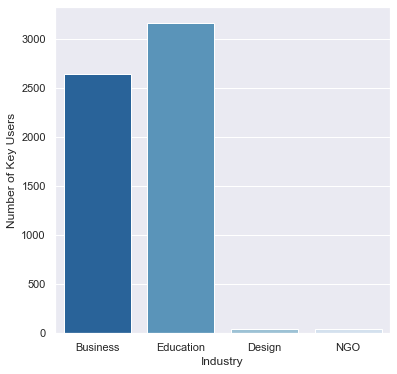

In [147]:
ax = sns.barplot(x="Industry", y="Number of Key Users", data=pu_catg, palette="Blues_r")